# Applied Data Science : VADER Improvement




VADER (Valence Aware Dictionary and sEntiment Reasoner) is a pre-built, lexicon and rule-based sentiment analysis tool designed for analyzing text data in natural language. It is specifically crafted to handle sentiments expressed in social media texts, as it incorporates features like handling of emoticons, capitalization, and context-based sentiment scoring.

Here are some key aspects of the VADER library:

Lexicon and Rule-Based Approach: VADER uses a combination of a sentiment lexicon (a predefined list of words and their associated sentiment scores) and a set of grammatical and syntactical rules to determine the sentiment of a piece of text.

* Valence Scores: The lexicon assigns polarity scores to words, indicating the positive or negative sentiment conveyed by each word. These scores range from -1 to 1, where -1 represents extreme negativity, 1 represents extreme positivity, and 0 represents neutrality.

* Emoticon Handling: VADER is designed to handle sentiments expressed through emoticons, making it suitable for analyzing text data from social media platforms where emoticons are commonly used to convey emotions.

* Capitalization and Punctuation: VADER takes into account the intensity of sentiment by considering the impact of capitalization and punctuation in the text.

* Contextual Valence Shifting: VADER can recognize and handle some degree of valence shifting, where the sentiment of a word changes based on the context in which it is used.

* Sentiment Intensity: VADER provides a compound score that represents the overall sentiment intensity of a piece of text. This score considers both the individual word scores and their arrangement in the text.

VADER is implemented in Python and is part of the NLTK (Natural Language Toolkit) library. It is widely used for quick and easy sentiment analysis tasks, especially in situations where training a machine learning model for sentiment analysis may not be feasible or necessary. However, it's important to note that while VADER is a useful tool, it may not perform as well as more sophisticated machine learning models on certain types of data or in specific domains.

## Setup environment

In [53]:
import pandas as pd
import os
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Import Data

In [54]:
df = pd.read_csv("output_2.csv")

In [55]:
df

,date,link,content,transform,stem,jaccard_similarity
0,1998-06-09,https://www.ecb.europa.eu/press/pressconf/1998...,ECB Press conference: Introductory statement\n...,"['ecb', 'press', 'conference', 'introductory',...","['ecb', 'press', 'confer', 'introductori', 'st...",NaN
1,1998-07-08,https://www.ecb.europa.eu/press/pressconf/1998...,ECB Press conference: Introductory statement\n...,"['ecb', 'press', 'conference', 'introductory',...","['ecb', 'press', 'confer', 'introductori', 'st...",0.060071
2,1998-09-01,https://www.ecb.europa.eu/press/pressconf/1998...,ECB Press conference: Introductory statement\n...,"['ecb', 'press', 'conference', 'introductory',...","['ecb', 'press', 'confer', 'introductori', 'st...",0.064062
3,1998-10-13,https://www.ecb.europa.eu/press/pressconf/1998...,".\nLadies and gentlemen, in line with our stat...","['ladies', 'gentlemen', 'line', 'stated', 'int...","['ladi', 'gentlemen', 'line', 'state', 'intent...",0.036315
4,1998-11-03,https://www.ecb.europa.eu/press/pressconf/1998...,". \nLadies and gentlemen, as in previous month...","['ladies', 'gentlemen', 'previous', 'months', ...","['ladi', 'gentlemen', 'previou', 'month', 'vic...",0.047558
...,...,...,...,...,...,...
270,2023-05-04,https://www.ecb.europa.eu/press/pressconf/2023...,"Good afternoon, the Vice-President and I welco...","['good', 'afternoon', 'vicepresident', 'welcom...","['good', 'afternoon', 'vicepresid', 'welcom', ...",0.202136
271,2023-05-23,https://www.ecb.europa.eu/press/pressconf/2023...,"Good afternoon, the Vice-President and I welco...","['good', 'afternoon', 'vicepresident', 'welcom...","['good', 'afternoon', 'vicepresid', 'welcom', ...",0.240066
272,2023-07-27,https://www.ecb.europa.eu/press/pressconf/2023...,"Good afternoon, the Vice-President and I welco...","['good', 'afternoon', 'vicepresident', 'welcom...","['good', 'afternoon', 'vicepresid', 'welcom', ...",0.264469
273,2023-09-14,https://www.ecb.europa.eu/press/pressconf/2023...,"Good afternoon, the Vice-President and I welco...","['good', 'afternoon', 'vicepresident', 'welcom...","['good', 'afternoon', 'vicepresid', 'welcom', ...",0.280069


### Compute the sentiement score with VADER

In [56]:
text_ecb = df["content"]

In [57]:
def compute_sentiment_score_vader(ecb_statement, display_outputs = False):

    # Initialize VADER sentiment intensity analyzer
    sid = SentimentIntensityAnalyzer()

    # Split the text into sentences based on punctuation '.'
    sentences = ecb_statement.split('.')

    # Remove any empty strings from the list
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

    # List to store sentiment scores for each sentence as dictionaries
    sentiment_scores_list = []

    # Compute sentiment scores for each sentence
    for sentence in sentences:
        ss = sid.polarity_scores(sentence)

        # Create a dictionary to store sentence content and its sentiment scores
        sentence_data = {
            "content": sentence,
            "positive_score": ss['pos'],
            "negative_score": ss['neg'],
            "neutral_score": ss['neu']
        }

        # Append the dictionary to the list
        sentiment_scores_list.append(sentence_data)

    # Compute average sentiment scores
    total_positive = sum(score['positive_score'] for score in sentiment_scores_list)
    total_negative = sum(score['negative_score'] for score in sentiment_scores_list)
    total_neutral = sum(score['neutral_score'] for score in sentiment_scores_list)

    average_positive = round(total_positive / len(sentiment_scores_list), 2)
    average_negative = round(total_negative / len(sentiment_scores_list), 2)
    average_neutral = round(total_neutral / len(sentiment_scores_list), 2)

    # Create a dictionary containing average sentiment scores
    vader_sentiment_output = {
        "average_positive": average_positive,
        "average_negative": average_negative,
        "average_neutral": average_neutral
    }

    # Determine if the statement is positive, neutral, or negative based on average scores
    if average_positive > average_negative and average_positive > average_neutral:
        sentiment = "Positive"
    elif average_negative > average_positive and average_negative > average_neutral:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    # Create a DataFrame
    df_data = {
        "ecb_statement": [ecb_statement],
        "sentiment_scores_list": [sentiment_scores_list],
        "vader_sentiment_output": [vader_sentiment_output],
        "negative_score" : average_negative,
        "positive_score" : average_positive,
        "neutral_score" : average_neutral,
        "overall_sentiment": [sentiment]
    }

    df = pd.DataFrame(df_data)

    if display_outputs == True:
        # Print the results
        print("##########################################")
        print("Sentiment Scores for Each Sentence:")
        print("##########################################")

        for sentence_data in sentiment_scores_list:
            print(f"Sentence: {sentence_data['content']}")
            print(f"Positive Score: {sentence_data['positive_score']}, Negative Score: {sentence_data['negative_score']}, Neutral Score: {sentence_data['neutral_score']}")
            print("-" * 50)

    print("##########################################")
    print("Sentiment Scores of the ECB Statement:")
    print("##########################################")
    print("\nAverage Sentiment Scores of the ECB Statement:")
    print(f"Average Positive Score: {average_positive}")
    print(f"Average Negative Score: {average_negative}")
    print(f"Average Neutral Score: {average_neutral}")

    print(f"\nOverall Sentiment of the Statement: {sentiment}")
    print("\n\n")

    # Return the DataFrame
    return df

In [58]:
# Init dataframe

text1 = text_ecb[0]
df_ecb_sentiment_score = compute_sentiment_score_vader(text1, False)

for i in range (1, len(text_ecb)-1):
    df_temp = compute_sentiment_score_vader(text_ecb[i], False)
    df_ecb_sentiment_score = pd.concat([df_ecb_sentiment_score, df_temp], ignore_index=True, sort=False)

df_ecb_sentiment_score = pd.merge(df_ecb_sentiment_score, df[['date']], left_index=True, right_index=True)
df_ecb_sentiment_score.to_csv('sentiment_score_vader.csv', index=False)

##########################################
Sentiment Scores of the ECB Statement:
##########################################

Average Sentiment Scores of the ECB Statement:
Average Positive Score: 0.04
Average Negative Score: 0.0
Average Neutral Score: 0.96

Overall Sentiment of the Statement: Neutral



##########################################
Sentiment Scores of the ECB Statement:
##########################################

Average Sentiment Scores of the ECB Statement:
Average Positive Score: 0.06
Average Negative Score: 0.02
Average Neutral Score: 0.87

Overall Sentiment of the Statement: Neutral



##########################################
Sentiment Scores of the ECB Statement:
##########################################

Average Sentiment Scores of the ECB Statement:
Average Positive Score: 0.06
Average Negative Score: 0.03
Average Neutral Score: 0.89

Overall Sentiment of the Statement: Neutral



##########################################
Sentiment Scores of the ECB Statement

### Plot the evolution of sentiment score over time

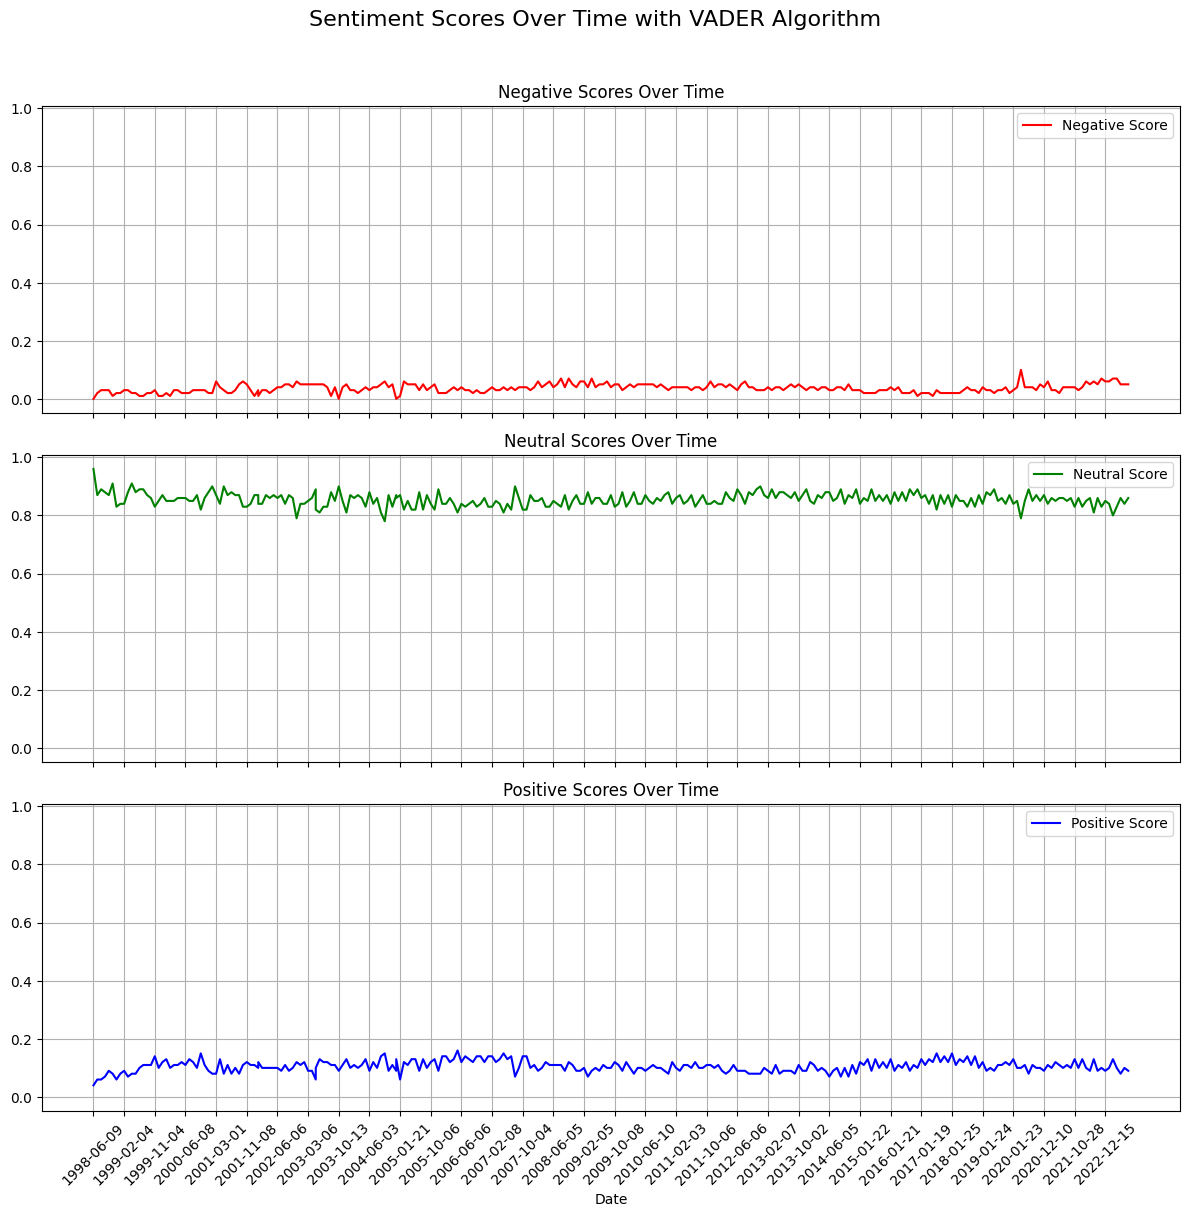

In [59]:
import matplotlib.pyplot as plt

# Assuming df_ecb_sentiment_score is your DataFrame
# Transform columns into lists
negative_scores = df_ecb_sentiment_score['negative_score'].tolist()
neutral_scores = df_ecb_sentiment_score['neutral_score'].tolist()
positive_scores = df_ecb_sentiment_score['positive_score'].tolist()

# Create a list of indices (assuming the DataFrame index is suitable)
date = df_ecb_sentiment_score['date'].tolist()

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True, sharey=True)

# Plot negative scores
axs[0].plot(date, negative_scores, label='Negative Score', color='r')
axs[0].set_title('Negative Scores Over Time')
axs[0].legend()
axs[0].grid(True)

# Plot neutral scores
axs[1].plot(date, neutral_scores, label='Neutral Score', color='g')
axs[1].set_title('Neutral Scores Over Time')
axs[1].legend()
axs[1].grid(True)

# Plot positive scores
axs[2].plot(date, positive_scores, label='Positive Score', color='b')
axs[2].set_title('Positive Scores Over Time')
axs[2].legend()
axs[2].grid(True)

# Set common labels
fig.suptitle('Sentiment Scores Over Time with VADER Algorithm', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.96])  # Adjust layout to accommodate suptitle

# Rotate x-axis labels by 45 degrees and display every third date
for ax in axs:
    ax.set_xticks(ax.get_xticks()[::2])  # Display every third tick
    ax.tick_params(axis='x', rotation=45)

plt.xlabel('Date')

# Display the plot
plt.show()
